# Linear Regression

- LMS
- $(X^TX)^{-1}X^Ty$
- exmples

In [ ]:
def LMS(y, x, w = None):
       
    i = 0
    maxIter = 100
    alpha, count = 0.001, 0
    
    # reshape x
    X = np.insert(x, 0, 1, axis=1)
    size, predictors = shape(X)
    
    if not w:
        w = np.zeros(predictors)
    
    while (i < maxIter) : # and abs(sum(w)) < predictors*5 :
        i += 1
           
        for j in xrange(size) :    
            expect_value = w.dot(X[j])
            true_value = y[j]
            w = w - alpha * ( expect_value - true_value )*X[j] 
            
            #alpha /= (1 + alpha*count)
            #count+=1
            
    return w

### Fit Data Generated by Gaussian 

In [307]:
%pylab inline 
from scipy.stats import norm as gaussian 

Populating the interactive namespace from numpy and matplotlib


Average:
[[-0.87536876]
 [ 2.45588701]]
Cov:
[[ 45.28997114  32.43143366]
 [ 32.43143366  24.82436063]]


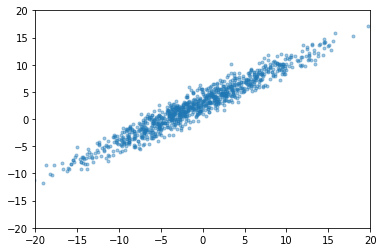

In [308]:
# Sample
X = gaussian.rvs(0,1,(2,1000)) # generate 2x1000 standard normal (y,x)
X[0,:] *= 8 # set y
X += np.array([[1],[2.5]]) # shift

# Rotate Matrix 
f = +pi/5
R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
# Rotate
V = R.dot(X)

# plot
# figure(figsize=(5,5)); 
a=20
xlim(-a,a);
ylim(-a,a);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;

# sample covariance matrix
avg = mean(V, axis=1).reshape(V[:,1].size,1)
print "Average:"
print avg
print "Cov:"
print dot(V-avg,(V-avg).T) / (V[0,:].size-1) 

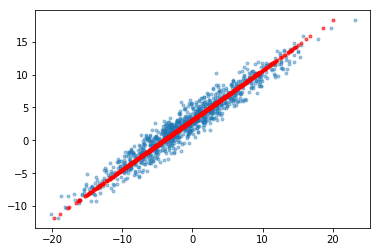

In [310]:
w_hat = LMS(V[0],V[1:,:].T)

plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(np.insert(V[1:,:].T,0,1,axis = 1).dot(w_hat),V[1,:], 'r.', alpha = 0.6 ) ;

### $ (X^TX)^{-1}X^Ty $

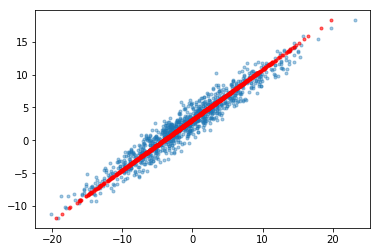

In [311]:
X = np.insert(V[1:,:].T,0,1,axis=1)
y = V[0]
W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)

plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot( X.dot(W_Hat)  ,V[1,:], 'r.', alpha = 0.6 ) ;

# 3D example

Average:
[[ 0.54569346]
 [ 2.21235774]
 [ 1.42178288]]
Cov:
[[ 27.1699199   23.44326299 -18.86319466]
 [ 23.44326299  21.96746558 -16.78979612]
 [-18.86319466 -16.78979612  14.50067194]]


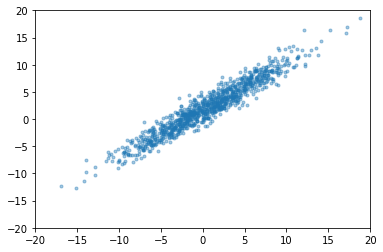

In [312]:
# Sample
X = gaussian.rvs(0,1,(3,1000)) # generate 2x1000 standard normal (y,x)
X[0,:] *= 8 # set y
X += np.array([[1],[2.5],[0]]) # shift

# Rotate Matrix 
f = +pi/5
R = array([[1,0,0],
           [0,cos(f),-sin(f)],
           [0,sin(f), cos(f)]]) 

R2 = array([[cos(f),-sin(f),0],
            [sin(f), cos(f),0],
            [0,0,1]]) 

R3 = array([[cos(f),0, sin(f)],
            [0,1,0],
            [-sin(f), 0, cos(f)]]) 
# Rotate
V = R3.dot(R2.dot(R.dot(X)))

# plot
# figure(figsize=(5,5)); 
a=20
xlim(-a,a);
ylim(-a,a);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;

# sample covariance matrix
avg = mean(V, axis=1).reshape(V[:,1].size,1)
print "Average:"
print avg
print "Cov:"
print dot(V-avg,(V-avg).T) / (V[0,:].size-1) 

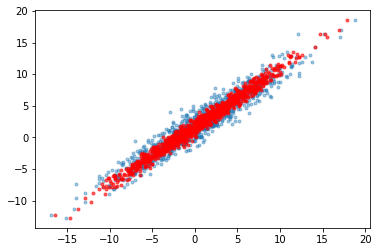

In [313]:
X = np.insert(V[1:,:].T,0,1,axis=1)
y = V[0]
W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)

plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot( X.dot(W_Hat)  ,V[1,:], 'r.', alpha = 0.6 ) ;

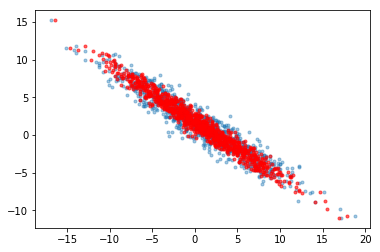

In [314]:
plot(V[0,:],V[2,:], '.', alpha=0.4) ;
plot( X.dot(W_Hat)  ,V[2,:], 'r.', alpha = 0.6 ) ;